<a href="https://colab.research.google.com/github/Prasadkpd/Machine-Learning/blob/master/Feature%20Selection/Feature_Selection_in_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Selection in Supervised Learning

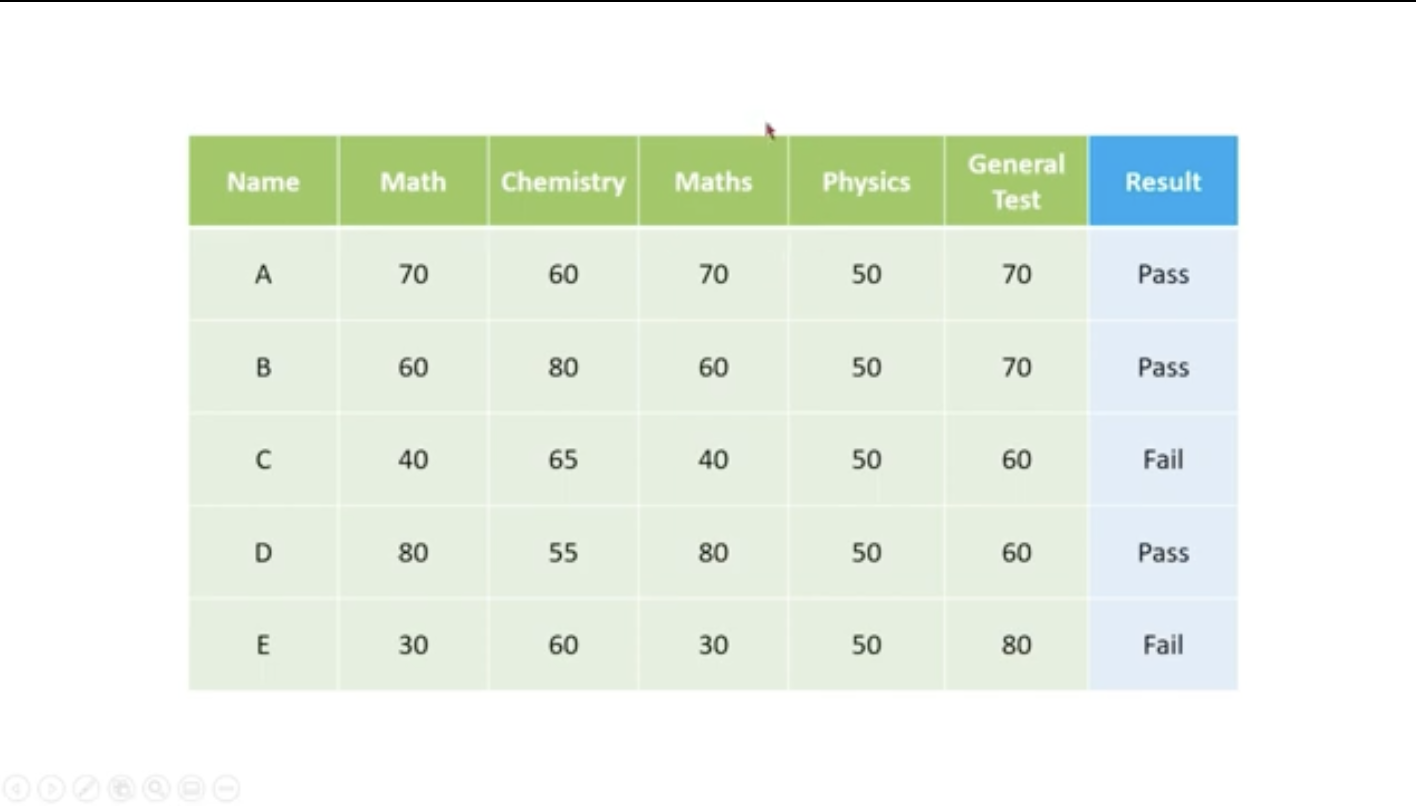

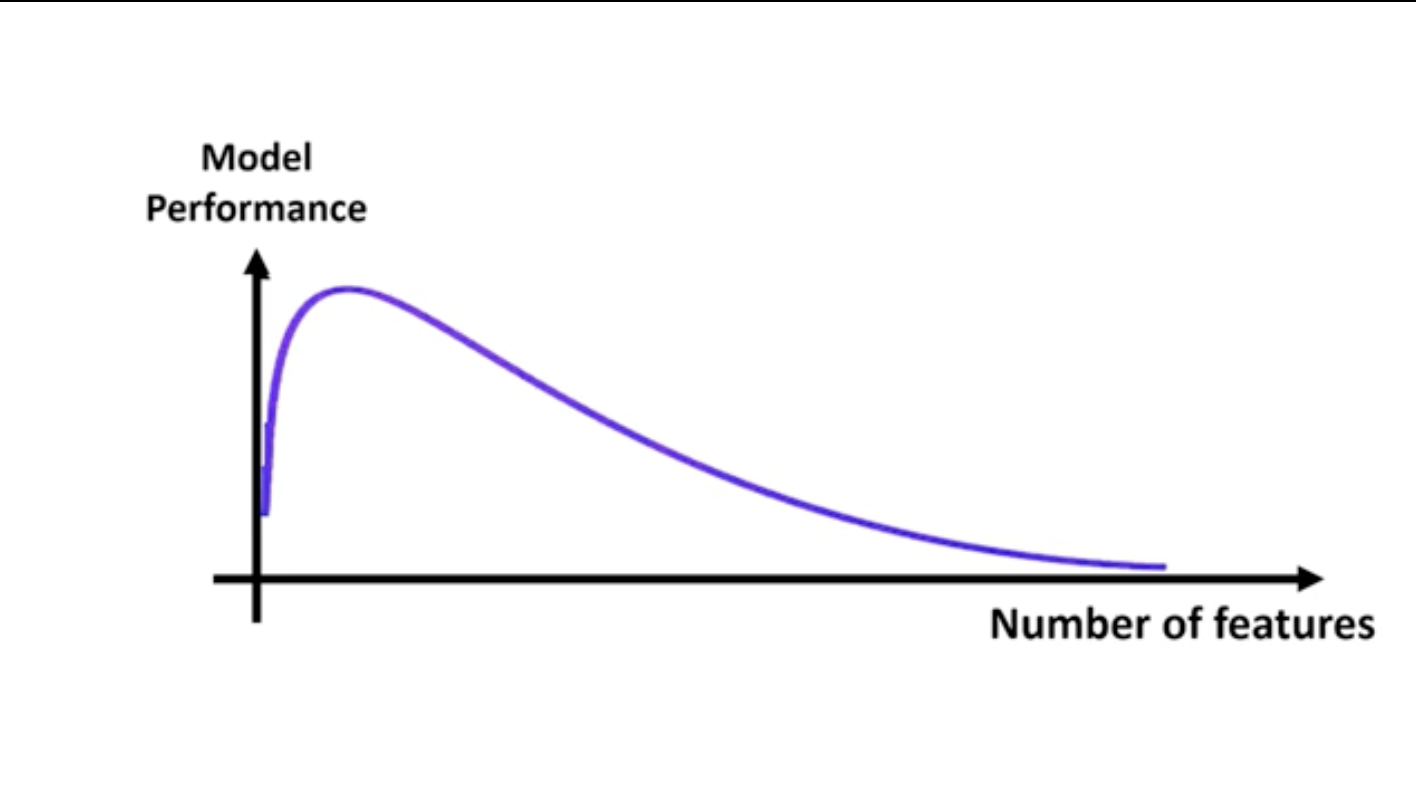

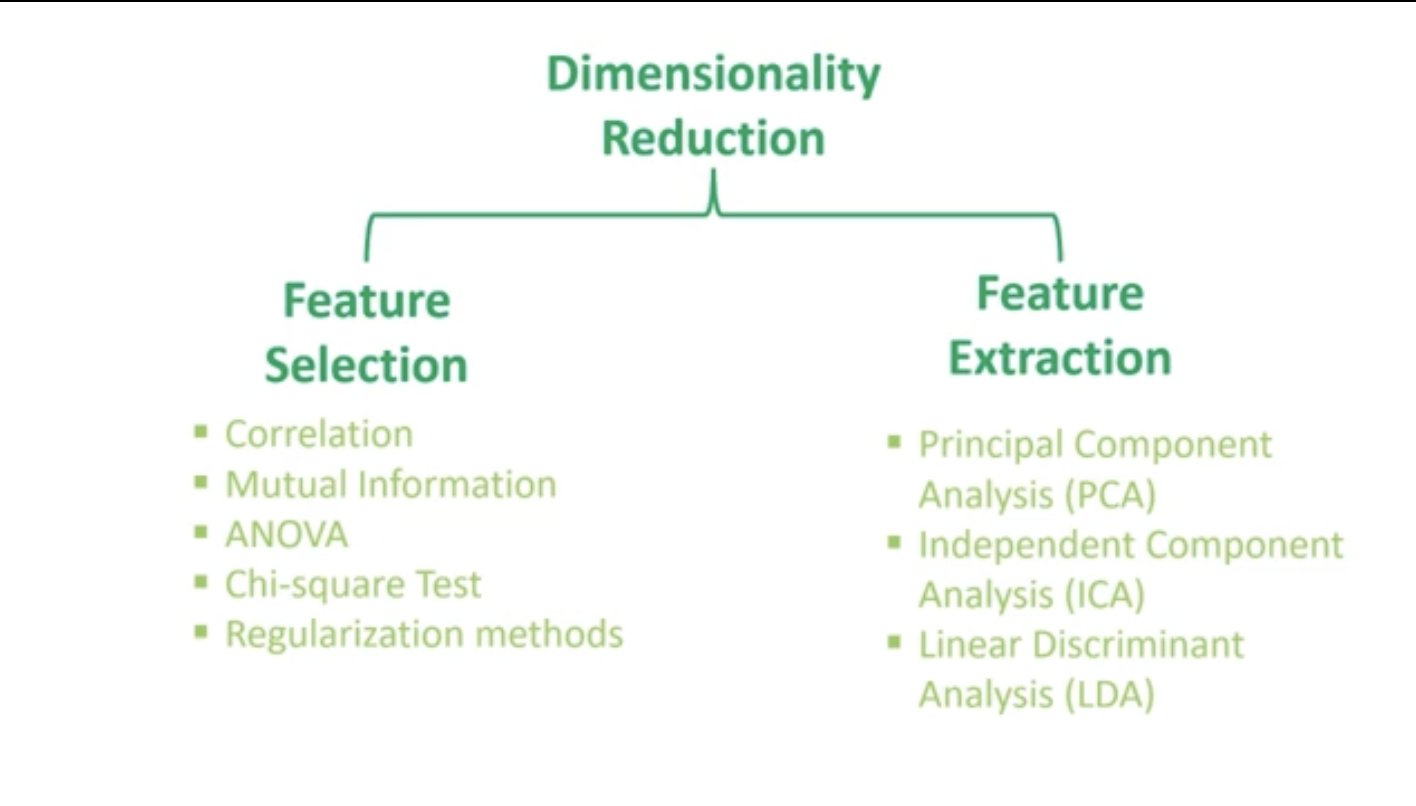

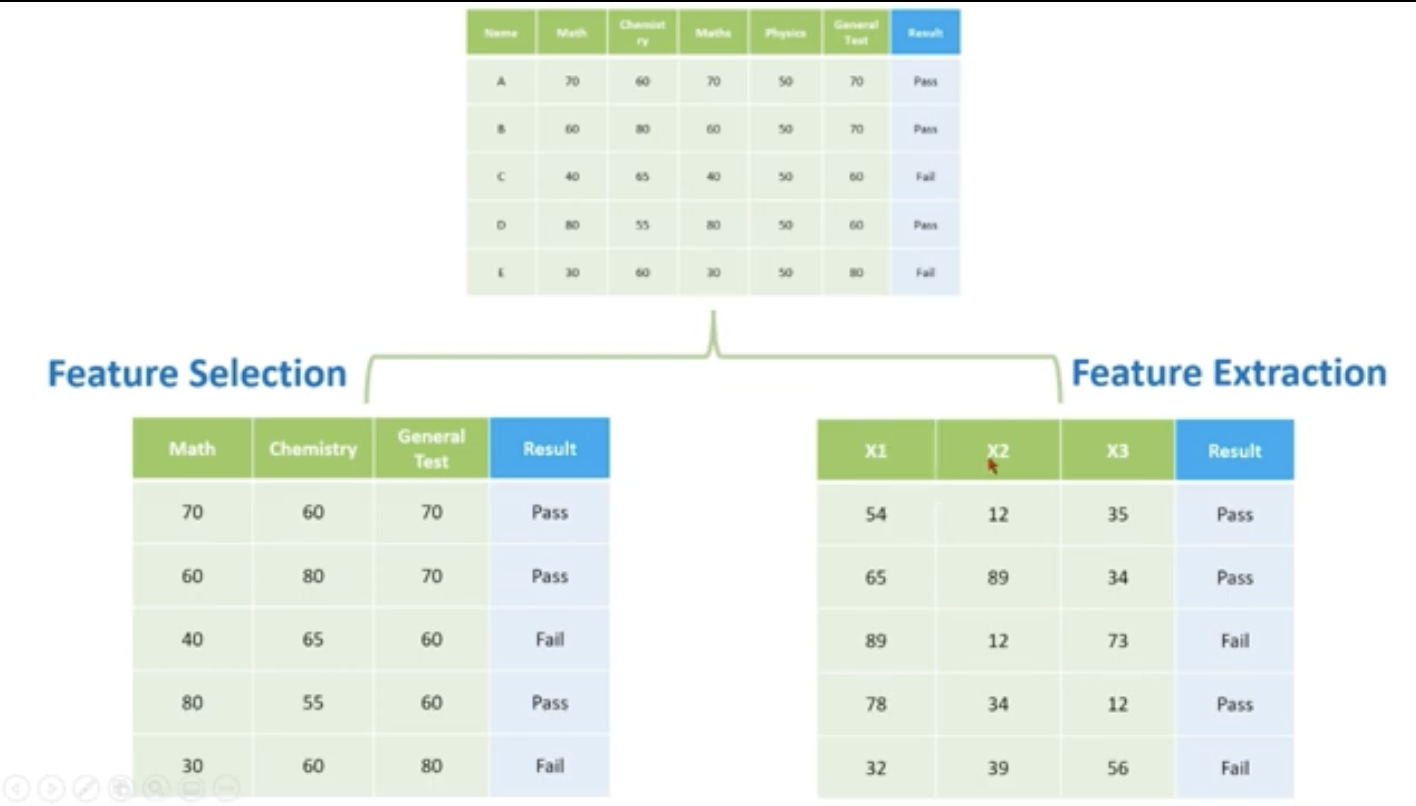

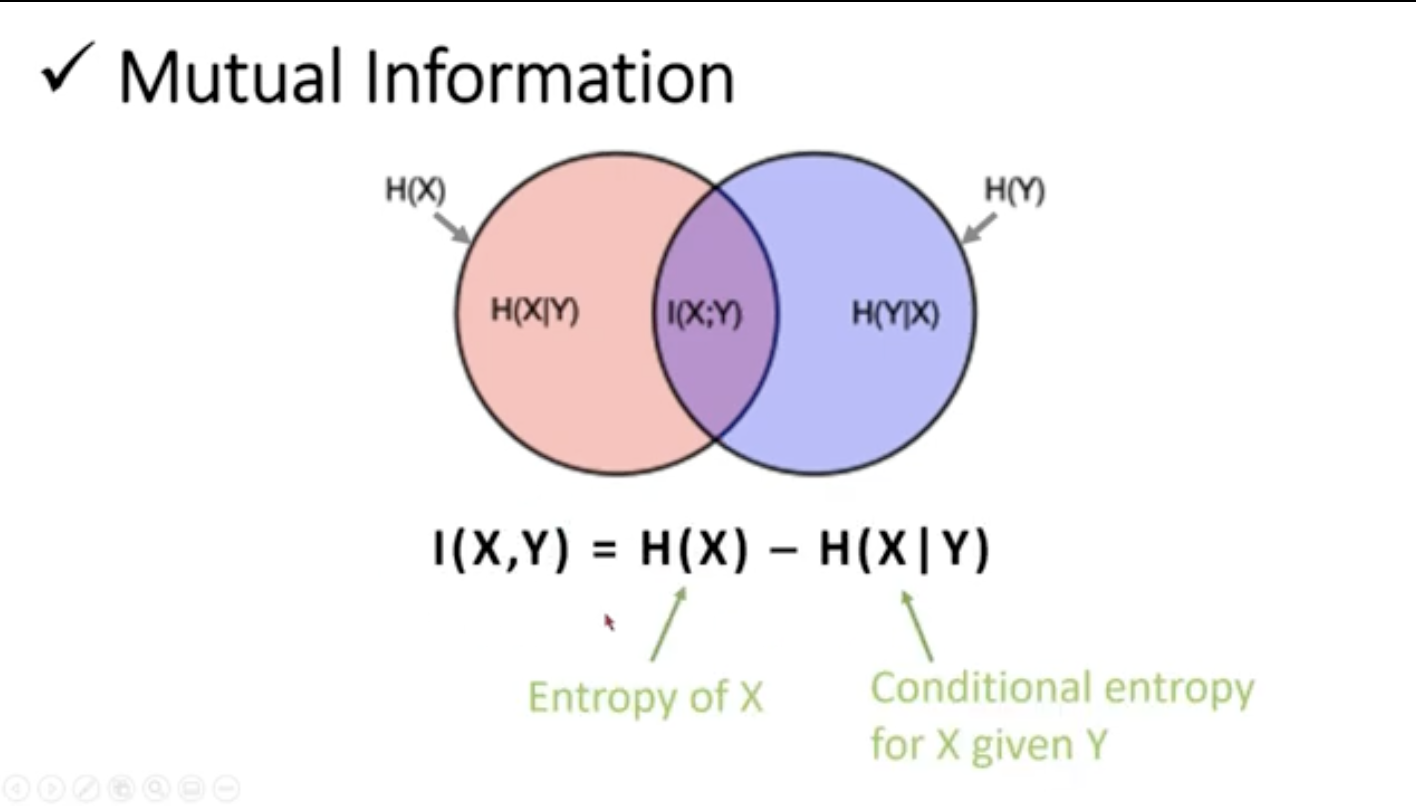

## Implementation for Regression Problem

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=50, n_features=5)

In [4]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4
0,-0.150091,0.972747,-0.123985,0.899481,-0.055657
1,0.907916,-0.090384,1.214171,0.532726,0.098459
2,-1.510854,0.615832,-0.436812,0.514592,-0.663351
3,0.150753,1.362087,0.742513,0.365492,-0.137770
4,-0.754841,1.131809,-0.230879,-0.281623,0.246643


In [5]:
y[:5]

array([  98.57065487,  238.22748521, -124.13271177,  170.30748666,
        -39.78538648])

In [7]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [9]:
fs = SelectKBest(score_func=mutual_info_regression, k=3)
fs.fit(x,y)

SelectKBest(k=3, score_func=<function mutual_info_regression at 0x7f9e6b79aca0>)

In [10]:
fs.scores_

array([0.13902439, 0.12513991, 0.05404612, 0.04678941, 0.15173103])

In [12]:
mi_score = pd.Series(fs.scores_, index=x.columns)
mi_score

0    0.139024
1    0.125140
2    0.054046
3    0.046789
4    0.151731
dtype: float64

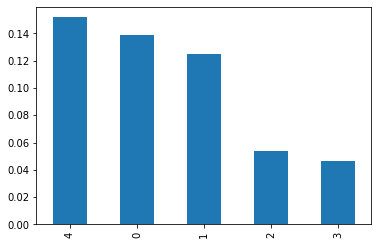

In [13]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [15]:
x_selected = fs.fit_transform(x,y)
x_selected = pd.DataFrame(x_selected)
x_selected.head()

,0,1,2
0,-0.150091,0.972747,-0.055657
1,0.907916,-0.090384,0.098459
2,-1.510854,0.615832,-0.663351
3,0.150753,1.362087,-0.137770
4,-0.754841,1.131809,0.246643


## Implementation for Classification Problem

In [16]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif

In [17]:
x,y = make_classification(n_samples=50, n_features=5, n_informative=2)
x = pd.DataFrame(x)

In [18]:
x.head()

,0,1,2,3,4
0,-0.347606,-0.425618,1.480296,1.442027,1.585784
1,0.070302,-0.077428,0.062400,-0.231991,0.008732
2,0.569892,-1.230416,1.839516,-1.660702,-1.131780
3,0.083388,0.199533,-0.570691,-0.381478,-2.321860
4,0.301766,-0.547490,0.743863,-0.917319,0.288309


In [19]:
y[:5]

array([1, 1, 1, 0, 1])

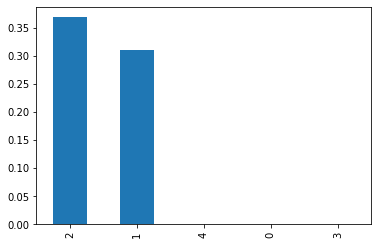

In [20]:
fs = SelectKBest(score_func= mutual_info_classif, k=3)
fs.fit(x,y)
mi_score = pd.Series(fs.scores_, index=x.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [21]:
selected_x = fs.fit_transform(x,y)
selected_x = pd.DataFrame(selected_x)

In [22]:
selected_x.head()

,0,1,2
0,-0.425618,1.480296,1.585784
1,-0.077428,0.062400,0.008732
2,-1.230416,1.839516,-1.131780
3,0.199533,-0.570691,-2.321860
4,-0.547490,0.743863,0.288309
